# 0. 필요 패키지 설치

In [1]:
# pip install pandas

In [2]:
# pip install matplotlib

In [3]:
# 패키지 import
import pandas as pd
import matplotlib.pyplot as plt

# A. 데이터 전처리 - 데이터 읽어오기
- Pandas를 사용하여 csv 파일(NLFX.csv)을 DataFrame 으로 읽어오기
- 이 때, ['Data', 'Open', 'High', 'Low', 'Close'] 필드만 읽어오기

In [4]:
csv_file = 'data/NFLX.csv'
# 파일의 경로 주의할것!

df = pd.read_csv(csv_file, usecols= ['Date', 'Open', 'High', 'Low', 'Close'])

In [5]:
#dataframe출력
df #

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [6]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

# B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기
- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링
    - [힌트] 필터링이 가능한 형식으로 데이터 타입을 변경한 후 필터링 진행
    - Pandas 의 to_datetime() 사용
- 필터링이 완료된 DataFrame 의 종가 데이터를 Matplotlib 를 사용하여 시각화

In [7]:
# 날짜 데이터 변환
df['Date'] = pd.to_datetime(df['Date'])
filter = (df['Date'] >= '2021-01-01')
df = df.loc[filter]
df

,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


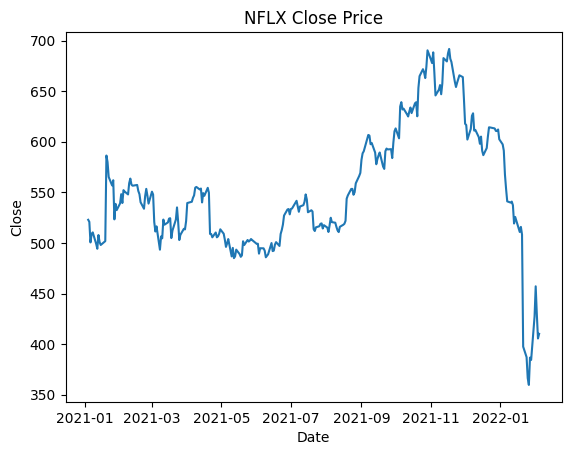

In [8]:
# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df['Date'], df['Close'])

# 그래프 제목 설정
plt.title('NFLX Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Close')

# 그래프 표시
plt.show()

# C. 데이터 분석 - 2021년 이후 최고, 최저 종가 출력하기
- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.
- 종가(Close) 필드를 활용하여, 2021년 이후 가장 높은 종가와 가장 낮은 종가를 출력합니다.
- Pandas의 내장 함수를 사용합니다.

In [9]:
df = pd.read_csv(csv_file, usecols= ['Date', 'Close'])
# 날짜 데이터 변환
df['Date'] = pd.to_datetime(df['Date'])
filter = (df['Date'] >= '2022-01-01')
df = df.loc[filter]

max_price = df.max()['Close']
min_price = df.min()['Close']

print("최고 종가:", max_price)
print("최저 종가:", min_price)

최고 종가: 597.369995
최저 종가: 359.700012


# D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기
- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링 합니다.
- 월 별로 그룹화하여 평균 종가를 계산한 새로운 DataFrame 을 만들어 그래프로 시각화 합니다.

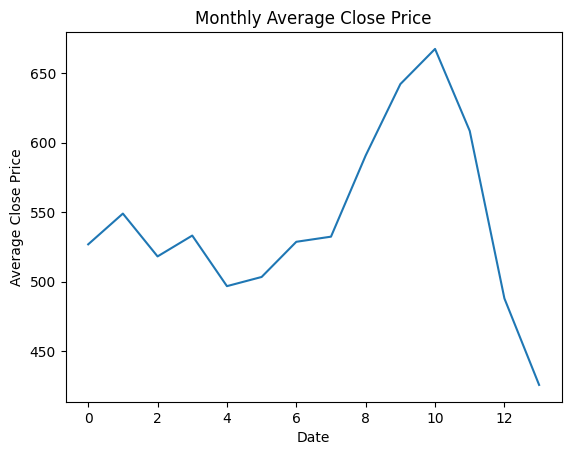

In [25]:
df = pd.read_csv(csv_file, usecols= ['Date', 'Close'])
# 날짜 데이터 변환
df['Date'] = pd.to_datetime(df['Date'])
filter = (df['Date'] >= '2021-01-01')
df = df.loc[filter]

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
# 년과 월로 그룹화하여 'Close' 열의 평균값을 계산
month_group = df.groupby(['Year', 'Month'])['Close'].mean()

#그래프를 그리기 위해 데이터를 정렬
month_group = month_group.reset_index()

# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(month_group.index, month_group['Close'])

# 그래프 제목 설정
plt.title('Monthly Average Close Price')

# 레이블 설정
plt.xlabel('Date')
plt.ylabel('Average Close Price')

# x축 눈금을 월단위로 설정하고, 날짜를 라벨로 사용합니다.
# plt.xticks(month_group.index, rotation=45)

# 그래프 표시
plt.show()

# E. 데이터 시각화 - 2022년 이후 최고, 최저, 종가 시각화 하기
- csv 파일을 DataFrame 으로 읽어와 2022년 이후의 데이터만 필터링합니다.
- Matplotlib 를 활용하여 3가지 필드를 한 번에 분석할 수 있도록 아래와 같이 시각화 합니다.

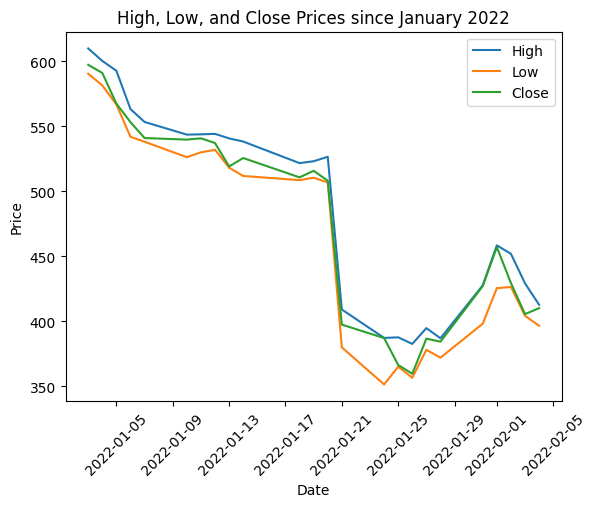

In [11]:
df = pd.read_csv(csv_file, usecols= ['Date', 'High', 'Low', 'Close'])
# 날짜 데이터 변환
df['Date'] = pd.to_datetime(df['Date'])
filter = (df['Date'] >= '2022-01-01')
df = df.loc[filter]

# 그래프 그리기
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.plot(df['Date'], df['Close'], label='Close')

# 그래프 제목 설정
plt.title('High, Low, and Close Prices since January 2022')

# 레이블 설정
plt.xlabel('Date')
plt.ylabel('Price')

# 범례 표시
plt.legend()

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 그래프 표시
plt.show()